In [ ]:
using Pkg
pkg_folder = "../"
Pkg.activate(pkg_folder)
using BenchmarkTools
import Markdown; Base.showable(::MIME"text/markdown", ::Markdown.MD) = false # to make sth like """?replace"""  works for vscode backend, remember to choose Jupyter kernel
include(pkg_folder*"src/initialize.jl")
Threads.nthreads() # check number of threads

  Activating project at `~/Realizibility_index/bnc_julia`


24

In [3]:
# Dimer then bind
q_sym = [:tA, :tG]
K_sym = [:K₁, :K₂]
x_sym = [:A, :G, :C₁, :C₂]
N =     [2  0  -1  0;
           1  1  0  -1]
model = Bnc(N=N, x_sym=x_sym, q_sym=q_sym, K_sym=K_sym)
find_all_vertices!(model)
summary(model)

---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 6 vertices found and 6 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
----------Binding Network Summary:-------------
Number of species (n): 4
Number of conserved quantities (d): 2
Number of reactions (r): 2
L matrix: [1 0 2 1; 0 1 0 1]
N matrix: [2 0 -1 0; 1 1 0 -1]
Direction of binding reactions: forward
Catalysis involved: No
Regimes constructed: Yes
Number of regimes: 6
  - Invertible + Asymptotic: 5
  - Singular +  Asymptotic: 1
  - Invertible +  Non-Asymptotic: 0
  - Singular +  Non-Asymptotic: 0
-----------------------------------------------


In [89]:
summary_vertex(model,6)

idx=6,perm=Int8[4, 4], asymptotic=true, nullity=1
volume=0.0 +- 0.0
Dominante condition


tA ~ C₂

tG ~ C₂

x expression
condition:


┌ Error: Vertex is singular, cannot get H0
└ @ Main ~/Realizibility_index/bnc_julia/bnc_regimes.jl:1063


tG ~ tA

(0.1(K₁^3.321928094887362)*(tA^3.321928094887362)) > (K₂^6.643856189774724)

tA > K₂

true

In [5]:
valid_rgm = get_vertices(model,singular=false)
expr = [show_expression_x(model,rgm;log_space=false) for rgm in valid_rgm]

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.



5-element Vector{Vector{Equation}}:
 [A ~ tA, G ~ tG, C₁ ~ (tA^2.0) / K₁, C₂ ~ (tA*tG) / K₂]
 [A ~ tA, G ~ (K₂*tG) / tA, C₁ ~ (tA^2.0) / K₁, C₂ ~ tG]
 [A ~ 0.7071067811865476(K₁^0.5)*(tA^0.5), G ~ tG, C₁ ~ 0.5tA, C₂ ~ (0.7071067811865476(K₁^0.5)*(tA^0.5)*tG) / K₂]
 [A ~ 0.7071067811865476(K₁^0.5)*(tA^0.5), G ~ (1.4142135623730951K₂*tG) / ((K₁^0.5)*(tA^0.5)), C₁ ~ 0.5tA, C₂ ~ tG]
 [A ~ (K₂*tA) / tG, G ~ tG, C₁ ~ ((K₂^2.0)*(tA^2.0)) / (K₁*(tG^2.0)), C₂ ~ tA]

In [6]:
expr .|> x->display(x[2])

G ~ tG

G ~ (K₂*tG) / tA

G ~ tG

G ~ (1.4142135623730951K₂*tG) / ((K₁^0.5)*(tA^0.5))

G ~ tG

5-element Vector{Nothing}:
 nothing
 nothing
 nothing
 nothing
 nothing

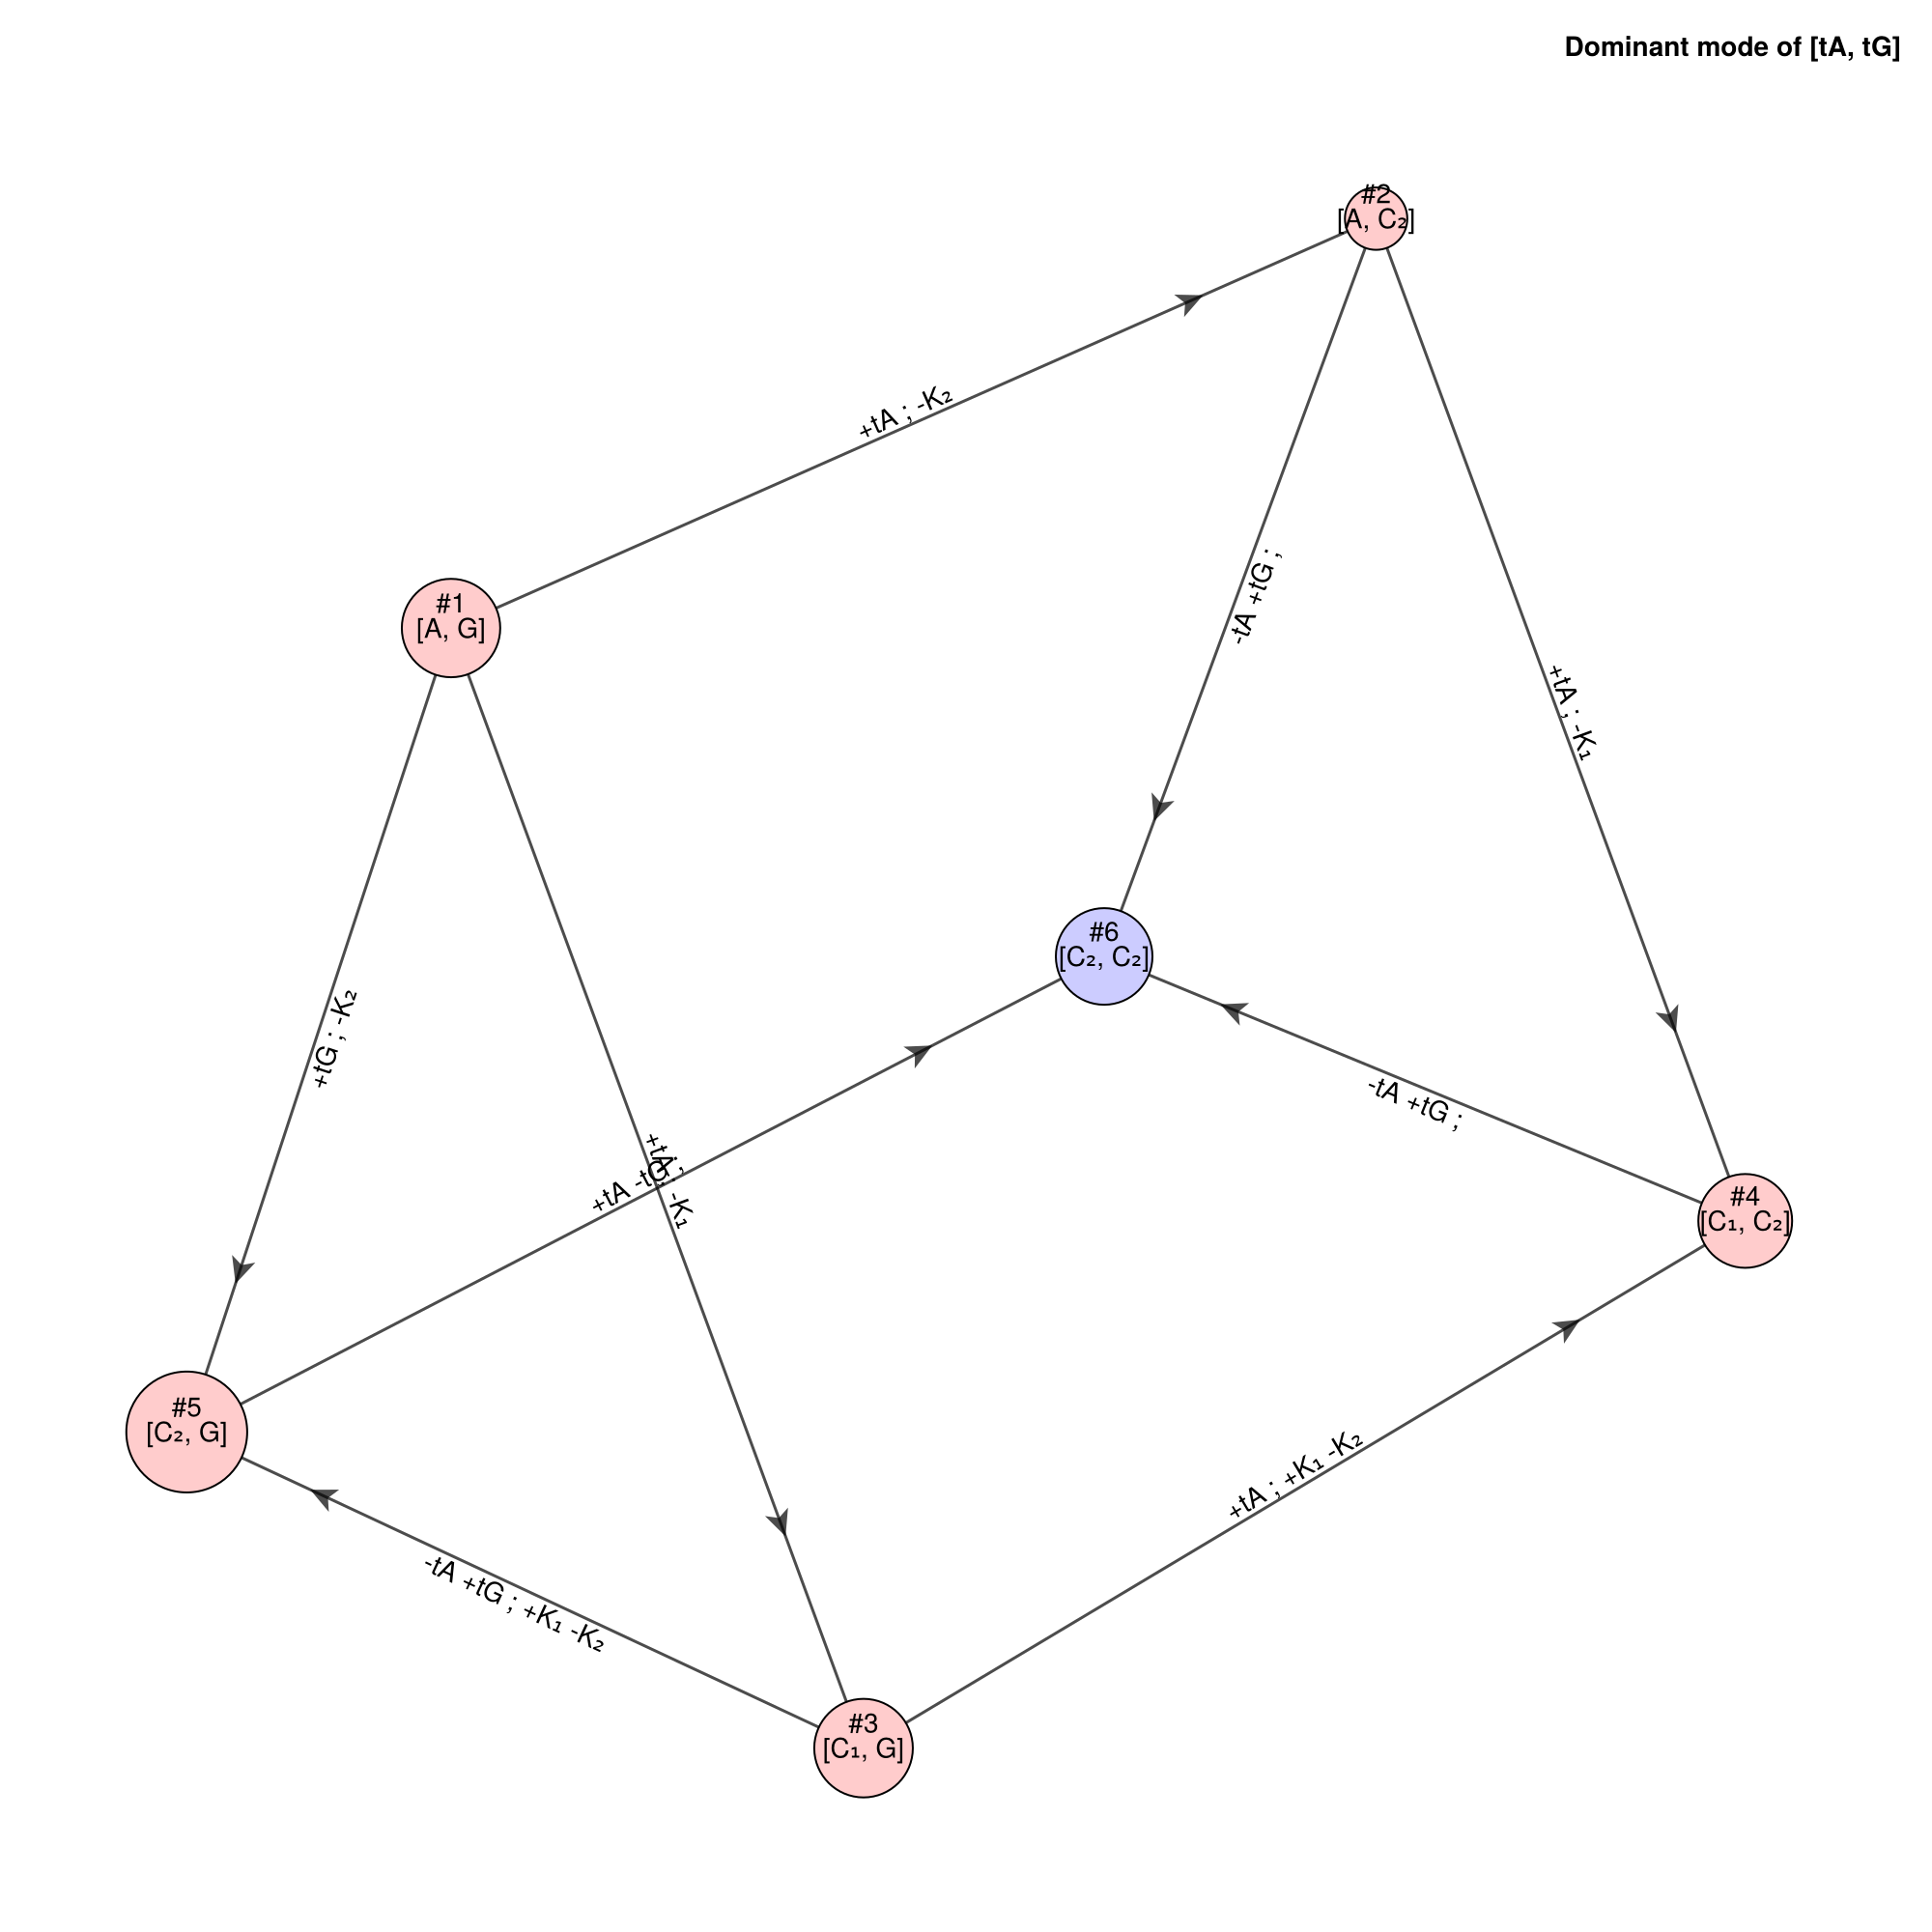

CairoMakie.Screen{IMAGE}


In [10]:
f,ax,p = draw_vertices_neighbor_graph(model)
add_vertices_idx!(ax,p)
display(f)

In [11]:
grh = SISO_graph(model,:tA)

[ Info: sources: [5, 1]
[ Info: sinks: [4]


SISO_graph{Int8}(Bnc{Int8}([2 0 -1 0; 1 1 0 -1], [1 0 2 1; 0 1 0 1], 2, 4, 2, Num[A, G, C₁, C₂], Num[tA, tG], Num[K₁, K₂], nothing, Vector{Int8}[[1, 2], [1, 4], [3, 2], [3, 4], [4, 2], [4, 4]], Dict{Vector{Int8}, Int64}([4, 2] => 5, [1, 4] => 2, [1, 2] => 1, [3, 4] => 4, [3, 2] => 3, [4, 4] => 6), Bool[1, 1, 1, 1, 1, 1], Int8[0, 0, 0, 0, 0, 1], VertexGraph{Int8}(SimpleGraph{Int64}(9, [[2, 3, 5], [1, 4, 6], [1, 4, 5], [2, 3, 6], [1, 3, 6], [2, 4, 5]]), Vector{VertexEdge{Int8}}[[VertexEdge{Int8}(3, 1, sparsevec(Int8[1, 3], Int8[-1, 1], 4), sparsevec(Int8[1, 3], [1.0, -1.0], 4)), VertexEdge{Int8}(5, 1, sparsevec(Int8[1, 4], Int8[-1, 1], 4), sparsevec(Int8[2, 4], [1.0, -1.0], 4)), VertexEdge{Int8}(2, 2, sparsevec(Int8[2, 4], Int8[-1, 1], 4), sparsevec(Int8[1, 4], [1.0, -1.0], 4))], [VertexEdge{Int8}(4, 1, sparsevec(Int8[1, 3], Int8[-1, 1], 4), sparsevec(Int8[1, 3], [1.0, -1.0], 4)), VertexEdge{Int8}(6, 1, sparsevec(Int8[1, 4], Int8[-1, 1], 4), sparsevec(Int8[1, 2], [-1.0, 1.0], 4)), Vertex

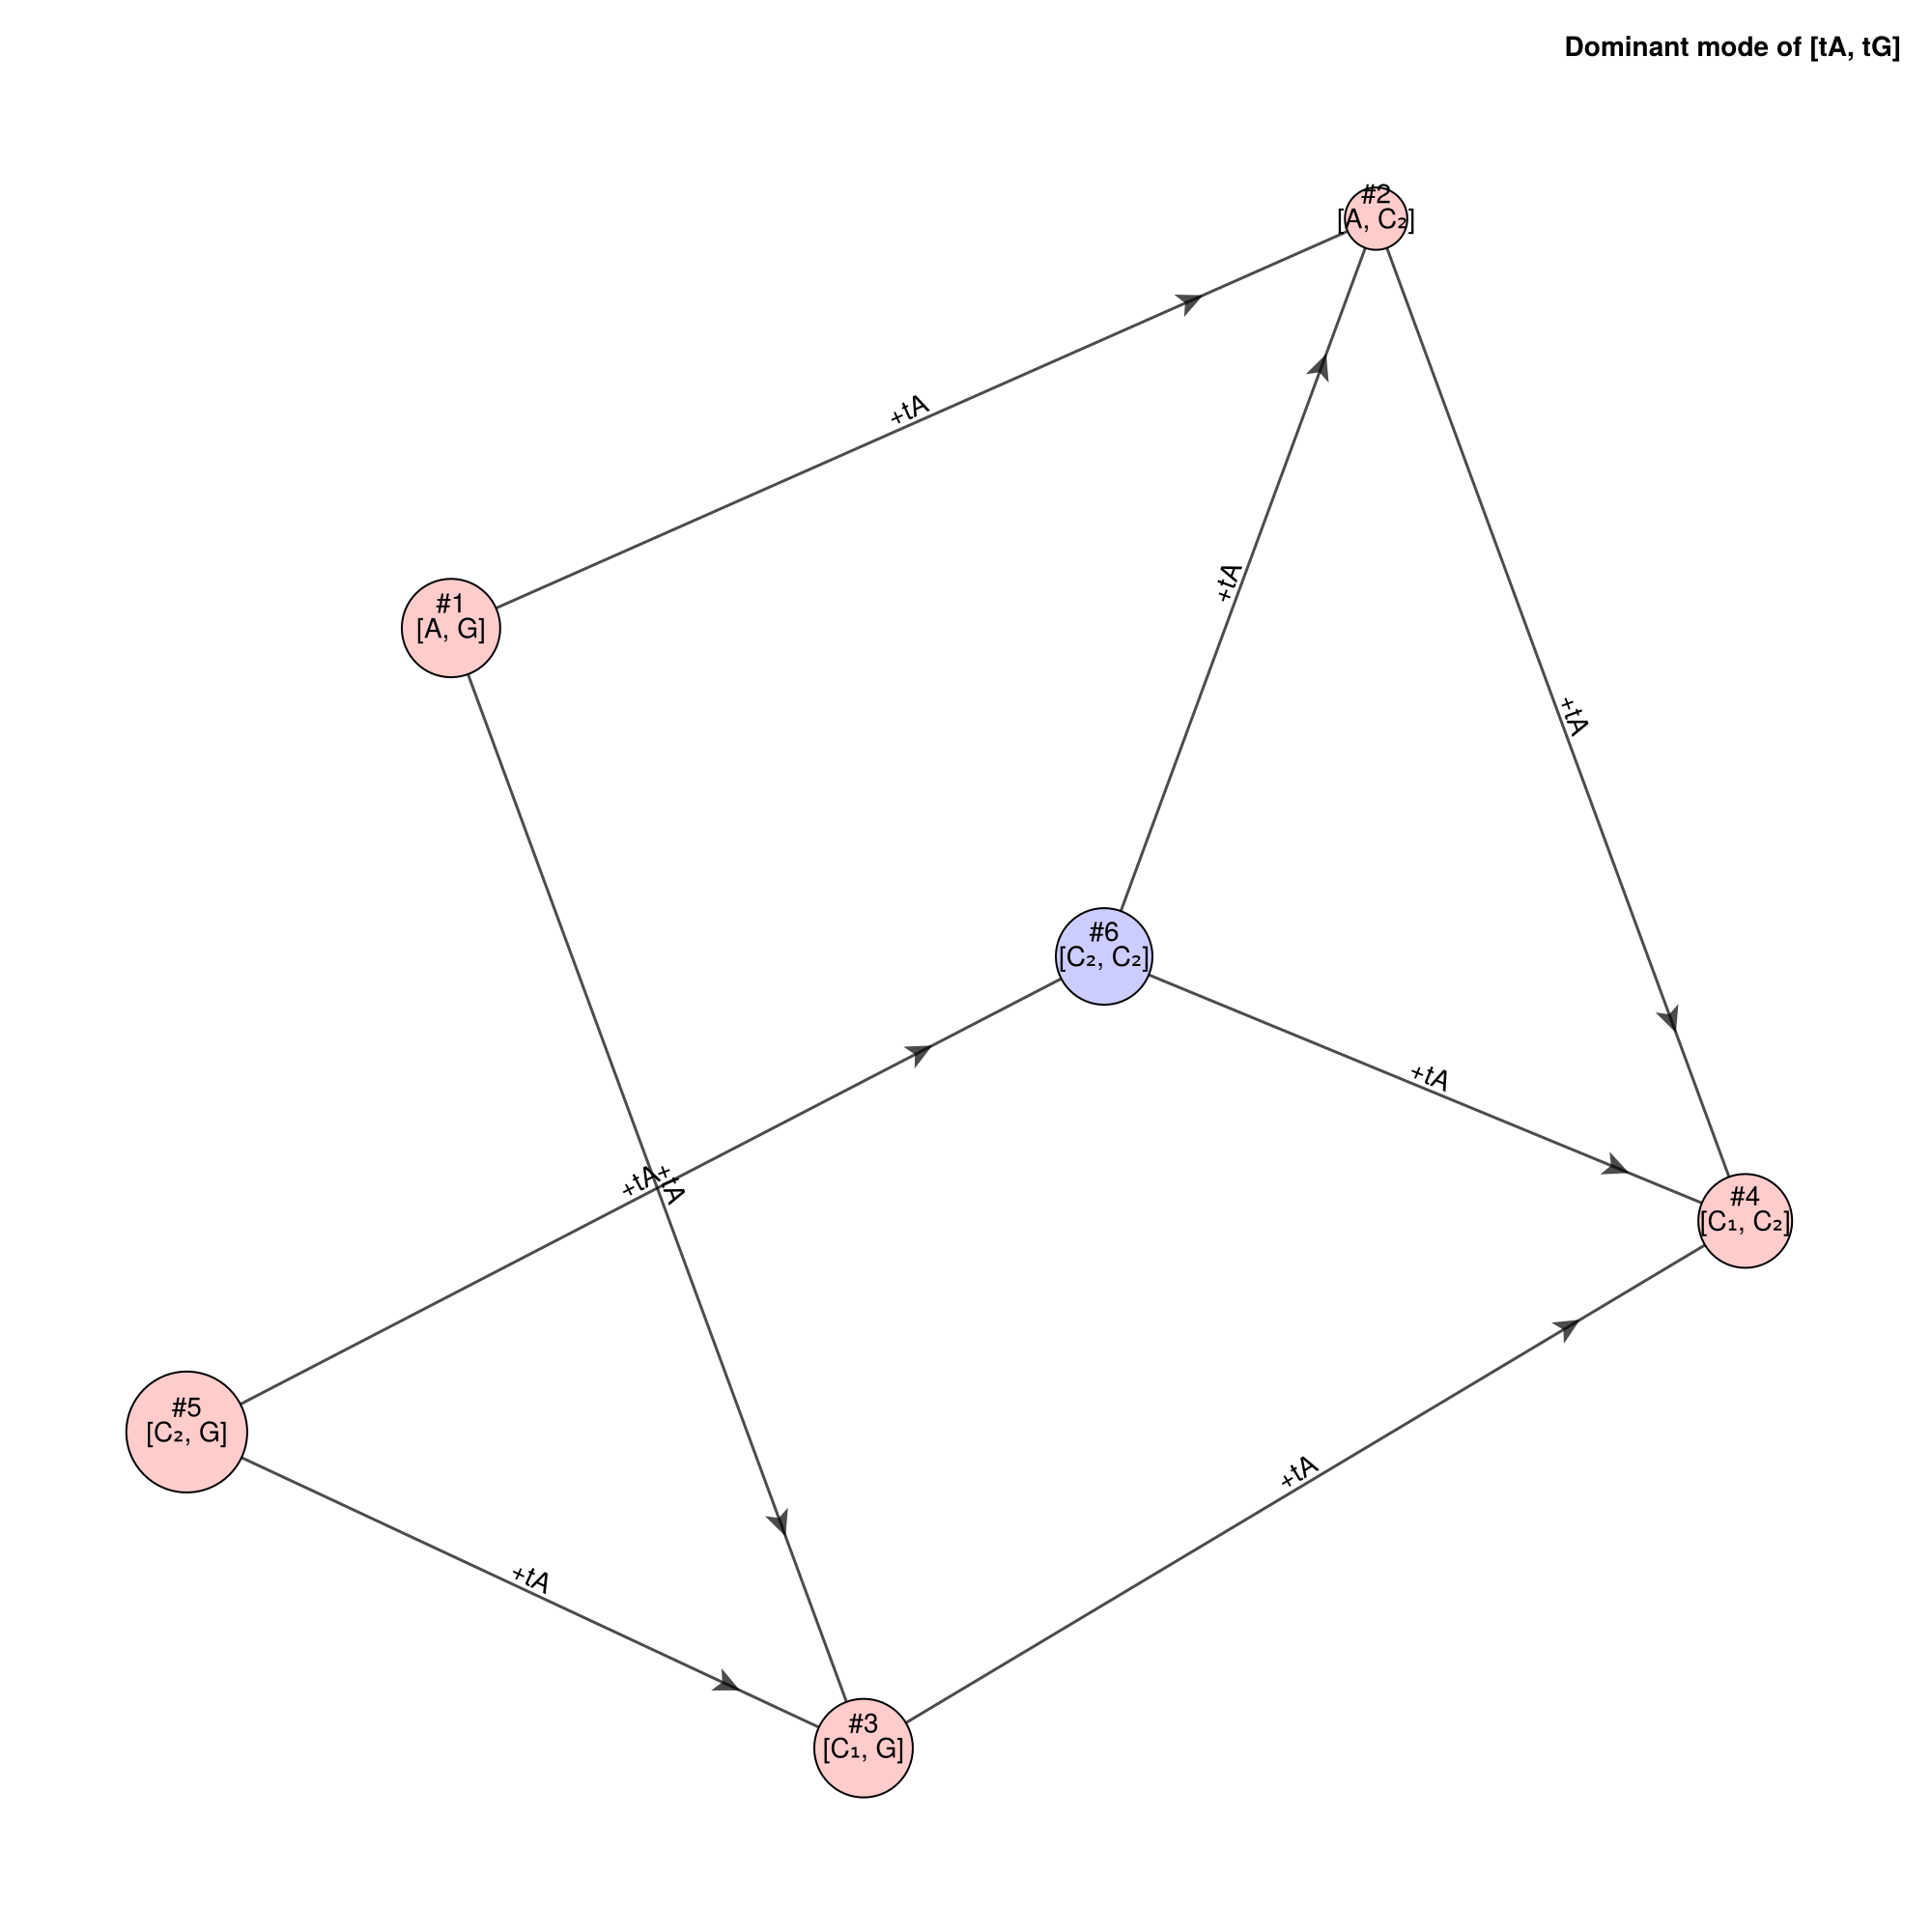

CairoMakie.Screen{IMAGE}


In [12]:
f,ax,p = draw_vertices_neighbor_graph(grh)
add_vertices_idx!(ax,p)
display(f)

In [18]:
show_expression_path(model,[5,6,2,4],:tA, :G)

(SymbolicUtils.BasicSymbolic{Real}[tG, (K₂*tG) / tA, (1.4142135623730951K₂*tG) / ((K₁^0.5)*(tA^0.5))], SymbolicUtils.BasicSymbolic{Real}[tG, 0.5K₁])

In [29]:
show_conservation(model) |> latexify|>print

\begin{align}
\mathtt{tA} &= A + 2 \mathtt{C{_1}} + \mathtt{C{_2}} \\
\mathtt{tG} &= \mathtt{C{_2}} + G
\end{align}


In [56]:
H,H0 = get_H_H0!(model,1)
C,C0 = get_C_C0_qK!(model,1)


(sparse([1, 3, 2, 1, 2, 3], [1, 1, 2, 3, 4, 4], [-1.0, -1.0, -1.0, 1.0, 1.0, 1.0], 3, 4), [-0.3010299956639812, 0.0, 0.0])

In [48]:
a = Matrix{Any}(H)

4×4 Matrix{Any}:
 1.0  0.0   0.0   0.0
 0.0  1.0   0.0   0.0
 2.0  0.0  -1.0   0.0
 1.0  1.0   0.0  -1.0

In [53]:
a[1,2]=nothing

In [90]:
render_matrix(exp10.(C0))

L"\begin{equation*}
\left[
\begin{array}{c}
0.5 \\
1 \\
1 \\
\end{array}
\right]
\end{equation*}
"

In [93]:
x_sym = [:A, :B, :C, :A₂ ,:A₂B, :A₂BC]
q_sym = [:tA, :tB, :tC]
K_sym = [:K₁, :K₂, :K₃]
N =     [2  0  0  -1   0 0  
         0  1  0   1  -1 0 
         0  0  1    0  1 -1]

model= Bnc(N=N, x_sym=x_sym, q_sym=q_sym, K_sym=K_sym)

Bnc{Int8}([2 0 … 0 0; 0 1 … -1 0; 0 0 … 1 -1], [1 0 … 2 2; 0 1 … 1 1; 0 0 … 0 1], 3, 6, 3, Num[A, B, C, A₂, A₂B, A₂BC], Num[tA, tB, tC], Num[K₁, K₂, K₃], nothing, Vector{Int8}[], Dict{Vector{Int8}, Int64}(), Bool[], Int8[], nothing, Vertex[], Bool[], false, Dict{Vector{Int8}, Tuple{SparseMatrixCSC{Float64, Int64}, Int8}}(), -1, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.8450980400142568, 0.47712125471966244, 0.3010299956639812, 0.0, 0.0, 0.0], false, sparse([1, 2, 3, 1, 1, 2, 1, 2, 3], [1, 2, 3, 4, 5, 5, 6, 6, 6], [1, 1, 1, 2, 2, 1, 2, 1, 1], 3, 6), sparse([1, 2, 3, 1, 1, 2, 1, 2, 3], [1, 2, 3, 4, 5, 5, 6, 6, 6], [1, 1, 1, 1, 1, 1, 1, 1, 1], 3, 6), [[1, 4, 5, 6], [2, 5, 6], [3, 6]], [1, 4, 6, 7], sparse([1, 2, 3, 1, 2, 2, 3, 3], [1, 2, 3, 4, 4, 5, 5, 6], [2, 1, 1, -1, 1, -1, 1, -1], 3, 6), sparse([1, 4, 2, 5, 3, 6, 1, 4, 5, 1, 2, 5, 6, 1, 2, 3, 6], [1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6], [1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, -1.0, 1.0, 2.0, 1.0, -1.0, 1.0, 2.0, 1.0, 1.0, -1.0], 6, 6

In [94]:
model.L

3×6 Matrix{Int64}:
 1  0  0  2  2  2
 0  1  0  0  1  1
 0  0  1  0  0  1

In [95]:
find_all_vertices!(model)

---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 20 vertices found and 20 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.


20-element Vector{Vector{Int8}}:
 [1, 2, 3]
 [1, 2, 6]
 [1, 5, 3]
 [1, 5, 6]
 [1, 6, 3]
 [1, 6, 6]
 [4, 2, 3]
 [4, 2, 6]
 [4, 5, 3]
 [4, 5, 6]
 [4, 6, 3]
 [4, 6, 6]
 [5, 2, 3]
 [5, 2, 6]
 [5, 5, 3]
 [5, 5, 6]
 [6, 2, 3]
 [6, 2, 6]
 [6, 6, 3]
 [6, 6, 6]

In [96]:
summary(model)

----------Binding Network Summary:-------------
Number of species (n): 6
Number of conserved quantities (d): 3
Number of reactions (r): 3
L matrix: [1 0 0 2 2 2; 0 1 0 0 1 1; 0 0 1 0 0 1]
N matrix: [2 0 0 -1 0 0; 0 1 0 1 -1 0; 0 0 1 0 1 -1]
Direction of binding reactions: backward
Catalysis involved: No
Regimes constructed: Yes
Number of regimes: 20
  - Invertible + Asymptotic: 13
  - Singular +  Asymptotic: 7
  - Invertible +  Non-Asymptotic: 0
  - Singular +  Non-Asymptotic: 0
-----------------------------------------------


In [ ]:
∂logx_∂logqK_sym(model)[get]

6×6 Matrix{Num}:
                                    ((-A₂B*A₂BC - A₂B*C - A₂BC*B - A₂BC*C - B*C)*tA) / (-A*A₂B*A₂BC - A*A₂B*C - A*A₂BC*B - A*A₂BC*C - A*B*C - (4//1)*A₂*A₂B*A₂BC - (4//1)*A₂*A₂B*C - (4//1)*A₂*A₂BC*B - (4//1)*A₂*A₂BC*C - (4//1)*A₂*B*C - (4//1)*A₂B*A₂BC*B - (4//1)*A₂B*B*C - (4//1)*A₂BC*B*C)  …                                                                    ((-2//1)*A₂BC*B*C) / (-A*A₂B*A₂BC - A*A₂B*C - A*A₂BC*B - A*A₂BC*C - A*B*C - (4//1)*A₂*A₂B*A₂BC - (4//1)*A₂*A₂B*C - (4//1)*A₂*A₂BC*B - (4//1)*A₂*A₂BC*C - (4//1)*A₂*B*C - (4//1)*A₂B*A₂BC*B - (4//1)*A₂B*B*C - (4//1)*A₂BC*B*C)
                               (((2//1)*A₂B*A₂BC + (2//1)*A₂B*C + (2//1)*A₂BC*C)*tA) / (-A*A₂B*A₂BC - A*A₂B*C - A*A₂BC*B - A*A₂BC*C - A*B*C - (4//1)*A₂*A₂B*A₂BC - (4//1)*A₂*A₂B*C - (4//1)*A₂*A₂BC*B - (4//1)*A₂*A₂BC*C - (4//1)*A₂*B*C - (4//1)*A₂B*A₂BC*B - (4//1)*A₂B*B*C - (4//1)*A₂BC*B*C)                                                           (-A*A₂BC*C - (4//1)*A₂*A₂BC*C) / (-A*A₂B*A₂BC - A*A₂B*

In [140]:
i=0

0

In [137]:
model.x_sym

6-element Vector{Num}:
    A
    B
    C
   A₂
  A₂B
 A₂BC

In [142]:
M = [1 0 0
     0 1 0
     0 0 1
     2 0 0
     2 1 0
     2 1 1]

6×3 Matrix{Int64}:
 1  0  0
 0  1  0
 0  0  1
 2  0  0
 2  1  0
 2  1  1

In [161]:
i+=1
println("singular? $(is_singular(model,1))")
get_H!(model,i)[1:6,1:3]|> render_matrix


singular? false


┌ Error: Vertex's nullity is bigger than 1, cannot get H
└ @ Main ~/Realizibility_index/bnc_julia/bnc_regimes.jl:1072


L"\begin{equation*}
\left[
\begin{array}{ccc}
 &  &  \\
 &  &  \\
 &  &  \\
 &  &  \\
 &  &  \\
 &  &  \\
\end{array}
\right]
\end{equation*}
"

In [94]:
a = rand(3,5)

3×5 Matrix{Float64}:
 0.0453315  0.173545   0.433763  0.00430724  0.383765
 0.0474231  0.979096   0.329118  0.6562      0.274844
 0.572589   0.0861087  0.484611  0.974243    0.379033

In [7]:
get_rand_nullspace(a)= begin
    ns = nullspace(a)
   ns_ptb = ns * rand(2,2)
return [a; ns_ptb']
end
   

get_rand_nullspace (generic function with 1 method)

In [124]:
A = get_rand_nullspace(a)
Z = inv(A)[:,1:3]

5×3 Matrix{Float64}:
 -0.152644   -0.287085   0.556239
 -0.0852809   0.984626  -0.528312
  1.30737    -0.20917    0.103947
 -1.01841     0.254919   0.675785
  1.19609    -0.177794   0.0481335

In [125]:
a * Z

3×3 Matrix{Float64}:
  1.0          7.05773e-18  9.48754e-17
  1.58624e-16  1.0          2.81552e-17
 -7.1188e-17   4.81751e-17  1.0